# Work Lab 3
by Yurii Voievidka

In [269]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import MaxPooling2D,  Flatten, Conv2D, Dense, Dropout
from keras.utils import to_categorical
from keras.models import Sequential

In [270]:
plt.style.use('fivethirtyeight')

In [271]:
from keras.datasets import cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [272]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [273]:
x_train = x_train / 255
x_test = x_test / 255

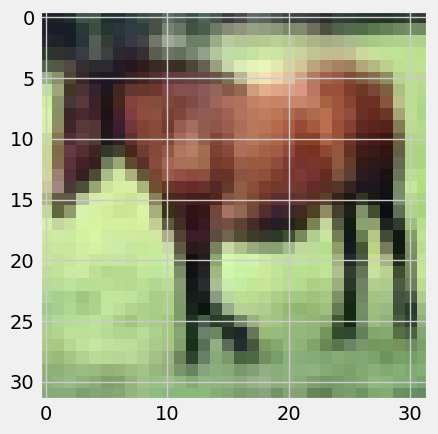

In [274]:
img = plt.imshow(x_train[7])

In [275]:
#Data Augumentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.5,
    zoom_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=False,
    vertical_flip=False)

datagen.fit(x_train)

In [ ]:
!['image'](https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network-1.jpg)

In [277]:
 pretrained_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=[32,32, 3]
    )

model = Sequential([
    # Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32,32,3)),
    # MaxPooling2D(pool_size=(2, 2)),
    # Conv2D(filters=64, kernel_size=3, activation='relu'),
    # MaxPooling2D(pool_size=(2, 2)),
    # Conv2D(filters=128, kernel_size=3, activation='relu'),
    # MaxPooling2D(pool_size=(2, 2)),
    # Flatten(),
    # Dense(1000, activation='relu'),
    # Dropout(0.25),
    # Dense(500, activation='relu'),
    # Dropout(0.25),
    # Dense(250, activation='relu'),
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(10, activation='softmax')
])

In [278]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [279]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train_one_hot, test_size=0.2, random_state=2)

In [280]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

In [281]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=250), epochs=10, validation_data=(x_val, y_val), steps_per_epoch=x_train.shape[0] // 250, callbacks=[early_stopping])

Epoch 1/10
160/160 [==============================] - 600s 4s/step - loss: 2.2122 - accuracy: 0.1694 - val_loss: 2.0386 - val_accuracy: 0.1955
Epoch 2/10
160/160 [==============================] - 620s 4s/step - loss: 1.9822 - accuracy: 0.2422 - val_loss: 1.7618 - val_accuracy: 0.3140
Epoch 3/10
160/160 [==============================] - 614s 4s/step - loss: 1.8273 - accuracy: 0.3006 - val_loss: 1.5056 - val_accuracy: 0.4257
Epoch 4/10
 31/160 [====>.........................] - ETA: 7:34 - loss: 1.7059 - accuracy: 0.3538


KeyboardInterrupt



In [210]:
predictions = model.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 2s 5ms/step - loss: 1.3479 - accuracy: 0.5139


In [211]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

In [212]:
airplane_image = plt.imread('./airplane.jpeg')
automobile_image = plt.imread('./automobile.jpeg')
bird_image = plt.imread('./bird.jpeg')
cat_image = plt.imread('./cat.jpeg')
deer_image = plt.imread('./deer.jpeg')
dog_image = plt.imread('./dog.jpeg')
frog_image = plt.imread('./frog.jpeg')
horse_image = plt.imread('./horse.png')
ship_image = plt.imread('./ship.jpeg')
truck_image = plt.imread('./truck.jpeg')

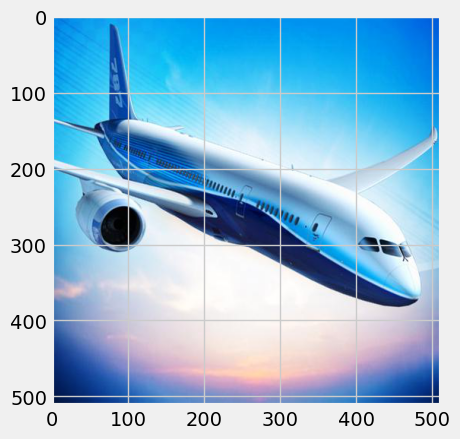

In [213]:
plt.imshow(airplane_image)

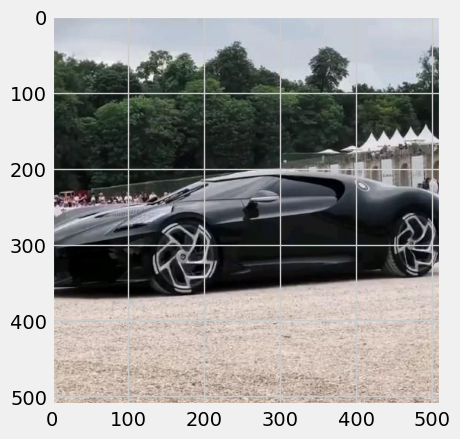

In [214]:
plt.imshow(automobile_image)

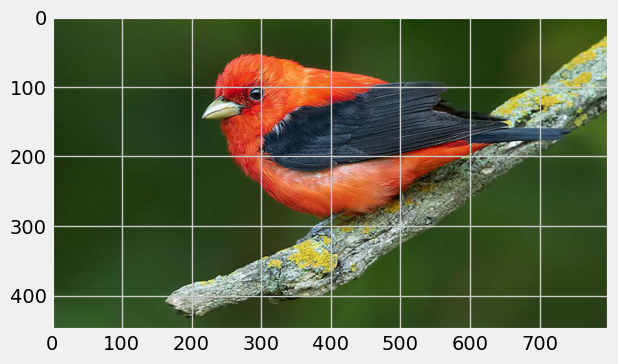

In [215]:
plt.imshow(bird_image)

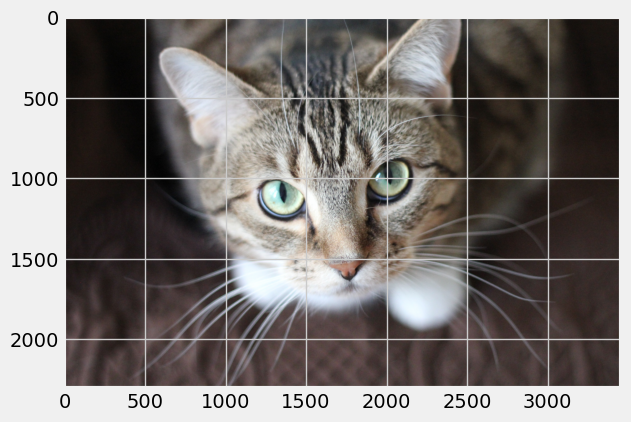

In [216]:
plt.imshow(cat_image)

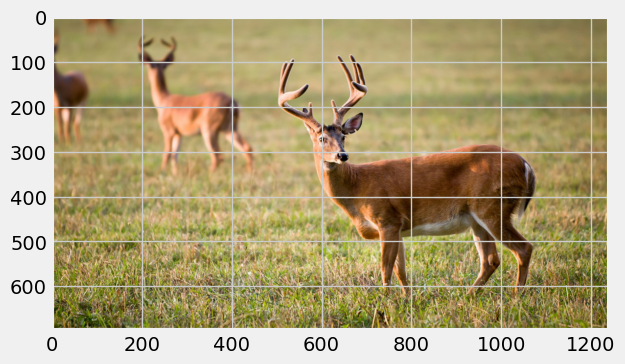

In [217]:
plt.imshow(deer_image)

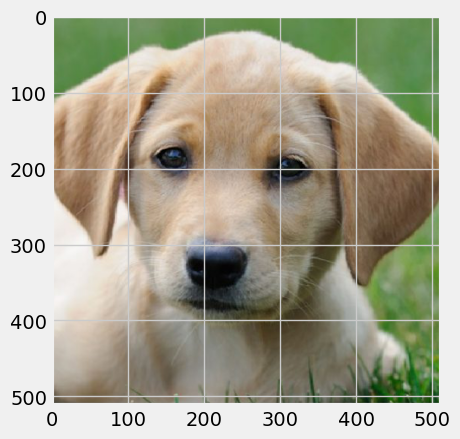

In [218]:
plt.imshow(dog_image)

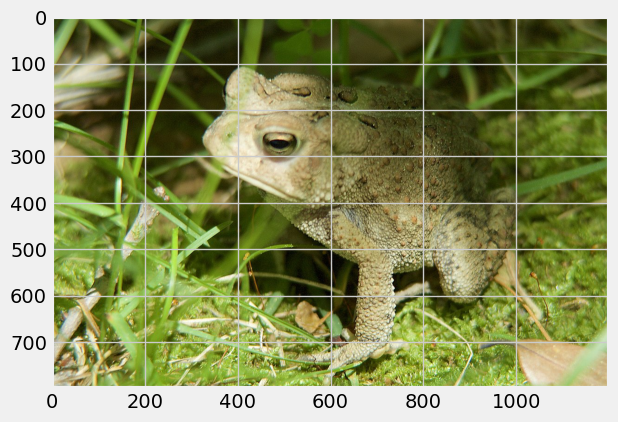

In [219]:
plt.imshow(frog_image)

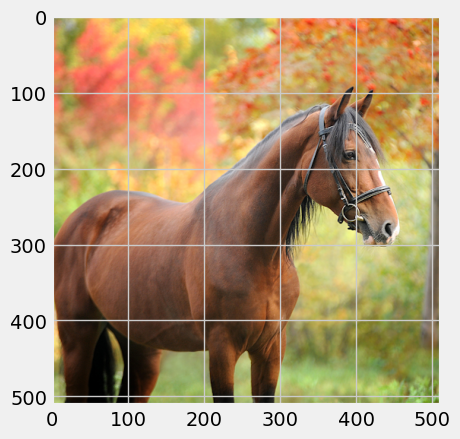

In [220]:
plt.imshow(horse_image)

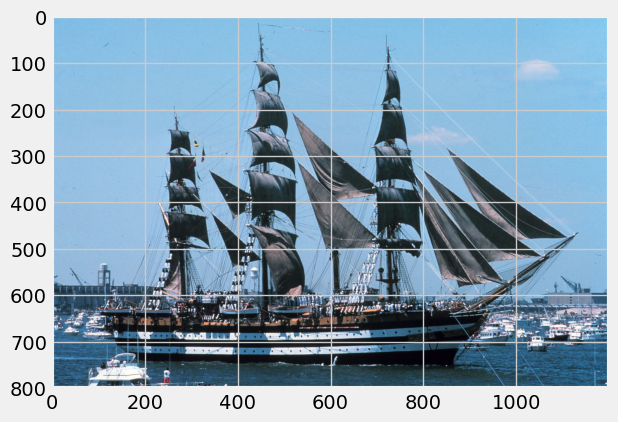

In [221]:
plt.imshow(ship_image)

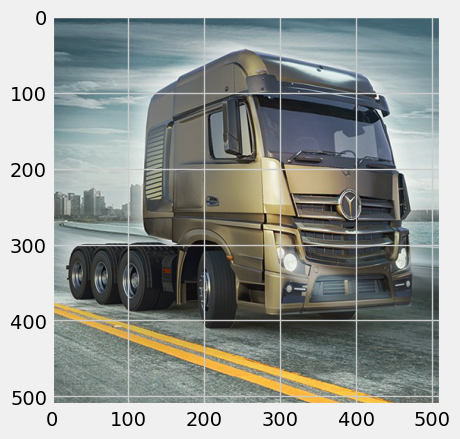

In [222]:
plt.imshow(truck_image)

In [225]:
from skimage.transform import resize
import numpy as np
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images = [airplane_image, 
automobile_image,
bird_image,
cat_image,
deer_image,
dog_image,
frog_image,
horse_image,
ship_image,
truck_image ]

resized_images = [resize(x, (32,32,3)) for x in images]

In [226]:
predictions = [model.predict(np.array([x])) for x in  resized_images]

1/1 [==============================] - 0s 14ms/step


In [227]:
list_index = [0,1,2,3,4,5,6,7,8,9]
for i in range(10): 
    sorted_middleware_predictions = sorted(predictions[i])
    for j in range(10):
     print(classification[list_index[j]],':',round(sorted_middleware_predictions[0][list_index[j]] * 100, 2))
    print('\n')

airplane : 36.67
automobile : 11.54
bird : 1.1
cat : 0.86
deer : 1.1
dog : 0.28
frog : 0.08
horse : 1.07
ship : 31.56
truck : 15.74


airplane : 2.99
automobile : 56.58
bird : 0.25
cat : 0.29
deer : 0.16
dog : 0.15
frog : 0.07
horse : 0.51
ship : 4.75
truck : 34.26


airplane : 16.66
automobile : 17.12
bird : 15.44
cat : 8.12
deer : 4.55
dog : 8.83
frog : 5.25
horse : 5.02
ship : 10.37
truck : 8.64


airplane : 2.27
automobile : 18.29
bird : 2.21
cat : 22.22
deer : 1.47
dog : 24.31
frog : 1.52
horse : 6.62
ship : 3.55
truck : 17.54


airplane : 0.53
automobile : 0.22
bird : 9.09
cat : 3.41
deer : 29.04
dog : 8.85
frog : 2.32
horse : 46.02
ship : 0.12
truck : 0.39


airplane : 1.31
automobile : 6.68
bird : 8.56
cat : 20.19
deer : 7.46
dog : 18.66
frog : 17.5
horse : 10.97
ship : 0.99
truck : 7.69


airplane : 0.05
automobile : 0.1
bird : 7.1
cat : 2.74
deer : 5.96
dog : 0.91
frog : 82.87
horse : 0.22
ship : 0.01
truck : 0.03


airplane : 0.24
automobile : 0.36
bird : 3.61
cat : 3.61
dee

<AxesSubplot:title={'center':'Loss with adam'}>

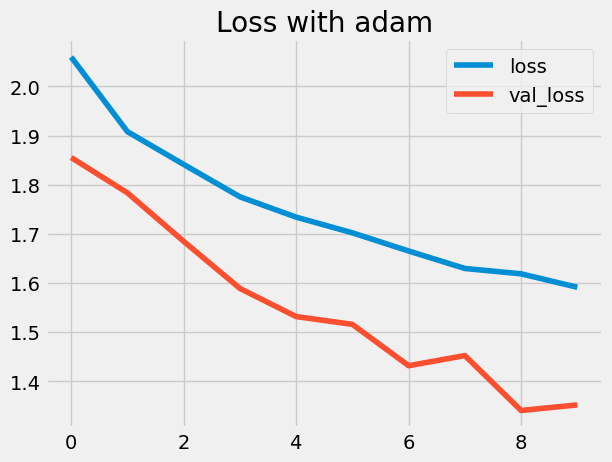

In [228]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title='Loss with adam')